In [160]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [161]:
# Load the array from the file
data_set = np.loadtxt('http_columns_1_and_2.csv', delimiter=',')

# Prints the n most common duplicate rows. Converts dataset rows to tuples and uses Counter.most_common(n) to get duplicated rows
top_n_duplicated_rows = lambda dataset, title, n: \
    print(f'{title}\n' + '\n'.join(
        [f'Row {row} occurs {duplicate_count} times' for _, (row, duplicate_count) in
         enumerate(Counter([tuple(row) for row in dataset]).most_common(n))
        ]))

top_n_duplicated_rows(data_set, 'Original Data', 25)

counter = sum([1 for row in data_set if 5 <= row[0] <= 6.3]) # add 1 for each row where 5 <= source bytes <= 6.3
percentage = counter / len(data_set) # percentage of data points between 5 and 6.3 source bytes
print(f"Number of rows with source bytes between 5 and 6.3: {counter}, percentage: {percentage}")

Original Data
Row (10.906691489914584, 9.025708147644988) occurs 2121 times
Row (-2.3025850929940455, -2.3025850929940455) occurs 303 times
Row (5.730424405602622, 7.900303100573046) occurs 278 times
Row (5.723911845951367, 6.980168959491182) occurs 275 times
Row (5.736894826106403, 8.07778859987851) occurs 273 times
Row (5.723911845951367, 7.229911239293994) occurs 273 times
Row (5.723911845951367, 7.713829278397293) occurs 273 times
Row (5.723911845951367, 7.8268819856755005) occurs 273 times
Row (5.727173427446777, 7.900303100573046) occurs 188 times
Row (5.733664849138071, 8.07778859987851) occurs 185 times
Row (5.720639591722624, 6.980168959491182) occurs 184 times
Row (5.720639591722624, 7.8268819856755005) occurs 184 times
Row (5.720639591722624, 7.229911239293994) occurs 184 times
Row (5.720639591722624, 7.713829278397293) occurs 183 times
Row (5.714062784063757, 7.8268819856755005) occurs 172 times
Row (5.714062784063757, 7.713829278397293) occurs 172 times
Row (5.727173427446

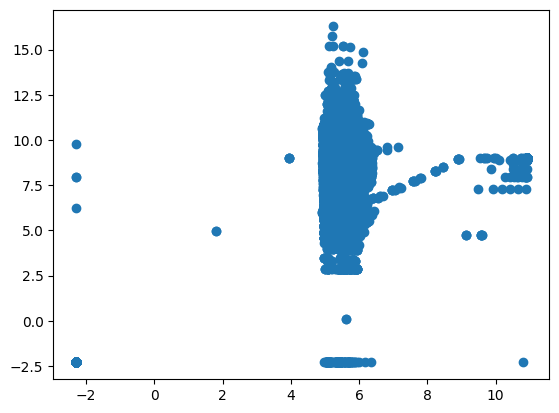

In [162]:
plt.scatter(data_set[:,0],data_set[:,1])

In [163]:
os.system("python main.py http_columns_1_and_2.csv out.csv")

0

In [164]:
scores = np.loadtxt('out.csv')

In [165]:
alpha = .66
mapping = []
for i in scores:
    if(i < alpha):
        mapping.append(1)
    else:
        mapping.append(-1)


[Feature Bias Method] data points = 567498, outliers = 2218, inliers = 565280
[Feature Bias Method] Outlier Data
Row (10.906691489914584, 9.025708147644988) occurs 2121 times
Row (10.906691489914584, 8.895643325672793) occurs 14 times
Row (10.906691489914584, 9.02582841801292) occurs 6 times
Row (10.89785166962525, 8.895643325672793) occurs 4 times
Row (10.674338553858657, 8.895643325672793) occurs 3 times
Row (9.648085495558297, 9.025708147644988) occurs 2 times
Row (10.886541204736588, 8.895643325672793) occurs 2 times
Row (10.881213871423181, 8.895643325672793) occurs 2 times
Row (10.739697742687715, 8.895643325672793) occurs 2 times
Row (10.906691489914584, 7.979373141251269) occurs 2 times
Row (10.886541204736588, 7.979373141251269) occurs 2 times
Row (10.498362921988095, 9.025708147644988) occurs 2 times
Row (9.954565573754072, 9.025708147644988) occurs 2 times
Row (9.121082837899754, 4.771531723203316) occurs 2 times
Row (10.751929757910776, 9.025708147644988) occurs 2 times
Row

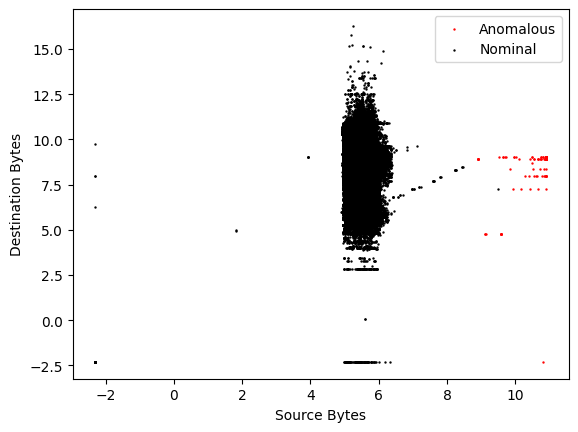

In [166]:
inlier = []
outlier = []
for count,i in enumerate(mapping):
    if(mapping[count] == 1):
        inlier.append(data_set[count])
    else:
        outlier.append(data_set[count])
inlier = np.array(inlier)
outlier = np.array(outlier)

print(f'[Feature Bias Method] data points = {len(mapping)}, outliers = {len(outlier)}, inliers = {len(inlier)}')
top_n_duplicated_rows(outlier, '[Feature Bias Method] Outlier Data', 25)
top_n_duplicated_rows(inlier, '[Feature Bias Method] Inlier Data', 25)
plt.scatter(outlier[:,0],outlier[:,1], c='red',  s = .5, label = "Anomalous")
plt.scatter(inlier[:,0],inlier[:,1], c='black', s = .5, label = "Nominal")
plt.legend()
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.show()

In [167]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination = .004)
model.fit(data_set)
mapping = model.predict(data_set)

[Sklearn] data points = 567498, outliers = 2165, inliers = 565333
[Sklearn] Outlier Data
Row (10.906691489914584, 9.025708147644988) occurs 2121 times
Row (10.906691489914584, 8.895643325672793) occurs 14 times
Row (10.906691489914584, 9.02582841801292) occurs 6 times
Row (10.89785166962525, 8.895643325672793) occurs 4 times
Row (10.674338553858657, 8.895643325672793) occurs 3 times
Row (10.886541204736588, 8.895643325672793) occurs 2 times
Row (10.881213871423181, 8.895643325672793) occurs 2 times
Row (10.739697742687715, 8.895643325672793) occurs 2 times
Row (10.751929757910776, 9.025708147644988) occurs 2 times
Row (10.88196591937912, 8.895643325672793) occurs 1 times
Row (10.824728014261197, 9.025708147644988) occurs 1 times
Row (10.819860281048467, 9.025708147644988) occurs 1 times
Row (10.897111478511128, 8.895643325672793) occurs 1 times
Row (10.858847062945161, 8.895643325672793) occurs 1 times
Row (10.812554253820947, -2.3025850929940455) occurs 1 times
Row (10.835968512489002

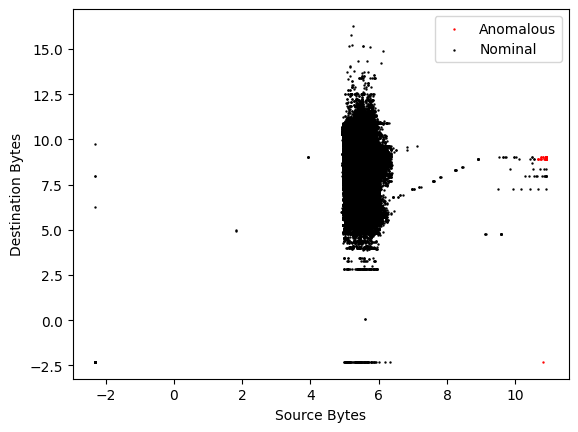

In [168]:
inlier = []
outlier = []
for count,i in enumerate(mapping):
    if(mapping[count] == 1):
        inlier.append(data_set[count])
    else:
        outlier.append(data_set[count])
inlier = np.array(inlier)
outlier = np.array(outlier)
print(f'[Sklearn] data points = {len(mapping)}, outliers = {len(outlier)}, inliers = {len(inlier)}')
top_n_duplicated_rows(outlier, '[Sklearn] Outlier Data', 25)
top_n_duplicated_rows(inlier, '[Sklearn] Inlier Data', 25)
plt.scatter(outlier[:,0],outlier[:,1], c='red',  s = .5, label = "Anomalous")
plt.scatter(inlier[:,0],inlier[:,1], c='black', s = .5, label = "Nominal")
plt.legend()
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.show()

In [169]:
mapping = np.loadtxt('outliers.csv', delimiter=',')

[Original Dataset] data points = 567498, outliers = 2211, inliers = 565287
[Original Dataset] Outlier Data
Row (10.906691489914584, 9.025708147644988) occurs 2120 times
Row (10.906691489914584, 8.895643325672793) occurs 14 times
Row (10.906691489914584, 9.02582841801292) occurs 6 times
Row (10.89785166962525, 8.895643325672793) occurs 4 times
Row (3.933784497209659, 9.002959435340971) occurs 4 times
Row (10.674338553858657, 8.895643325672793) occurs 3 times
Row (-2.3025850929940455, -2.3025850929940455) occurs 2 times
Row (9.648085495558297, 9.025708147644988) occurs 2 times
Row (10.886541204736588, 8.895643325672793) occurs 2 times
Row (10.881213871423181, 8.895643325672793) occurs 2 times
Row (10.739697742687715, 8.895643325672793) occurs 2 times
Row (10.906691489914584, 7.979373141251269) occurs 2 times
Row (10.886541204736588, 7.979373141251269) occurs 2 times
Row (10.498362921988095, 9.025708147644988) occurs 2 times
Row (9.954565573754072, 9.025708147644988) occurs 2 times
Row (1

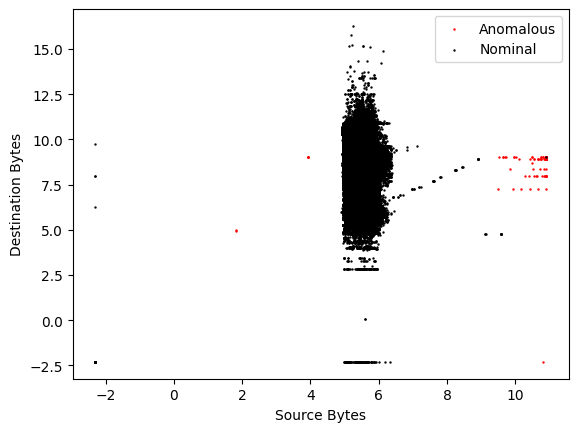

In [170]:
inlier = []
outlier = []
for count,i in enumerate(mapping):
    if(mapping[count] == 0):
        inlier.append(data_set[count])
    else:
        outlier.append(data_set[count])
inlier = np.array(inlier)
outlier = np.array(outlier)
print(f'[Original Dataset] data points = {len(mapping)}, outliers = {len(outlier)}, inliers = {len(inlier)}')
top_n_duplicated_rows(outlier, '[Original Dataset] Outlier Data', 25)
top_n_duplicated_rows(inlier, '[Original Dataset] Inlier Data', 25)
plt.scatter(outlier[:,0],outlier[:,1], c='red',  s = .5, label = "Anomalous")
plt.scatter(inlier[:,0],inlier[:,1], c='black', s = .5, label = "Nominal")
plt.legend()
plt.xlabel("Source Bytes")
plt.ylabel("Destination Bytes")
plt.show()